<a href="https://colab.research.google.com/github/dasom222g/learn-pandas/blob/main/02_Pandas_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8_%E1%84%8F%E1%85%A9%E1%84%83%E1%85%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석을 위한 패키지

## 2. 구조적 데이터 표시와 처리에 강한 pandas
- pandas는 index와 values로 이루어짐

### 판다스 연습 사이트: https://www.machinelearningplus.com/python/101-pandas-exercises-python/

### 2.1 구조적 데이터 생성하기

#### Series를 활용한 데이터 생성

In [37]:
import pandas as pd
import numpy as np

In [9]:
# Series는 1차원 데이터를 다룬다.
# 세로축 라벨을 index라고 하고, 입력한 시퀀스 데이터를 values라고 한다.
s1 = pd.Series([10, 20, 30, 40, 50], index=[1, 2, 3, 4, 5])
s1[1]

10

In [4]:
# series는 index와 values로 구성
s1.index

Index([1, 2, 3, 4, 5], dtype='int64')

In [ ]:
s1.values

array([10, 20, 30, 40, 50])

In [ ]:
# pandas는 데이터 타입이 섞여도 된다. Numpy는 같은 데이터 타입의 배열만 처리 가능
s2 = pd.Series(['a', 'b', 'c', 1, 2, 3])
type(s2[1])

str

In [ ]:
# np.nan을 이용해서 특정 데이터가 없음을 표시
import numpy as np

# NaN: 숫자가 아닌 값으로 데이터 없음 표시
# NaN이 들어가면 다른 숫자들 실수로 변환

s3 = pd.Series([np.nan,10,30])
s3

,0
0,NaN
1,10.0
2,30.0


In [ ]:
a1 = np.array(['a', 'b', 'c', 1, 2, 3])
type(a1[0]), type(a1[5])

(numpy.str_, numpy.str_)

In [ ]:
# Series, DataFrame에서는 여러 타입이 공존
s2 = pd.Series(['a', 'b', 'c', 1, 2, 3])
type(s2[0]), type(s2[5])

,0
0,a
1,b
2,c
3,1
4,2
5,3


In [ ]:
# 단 숫자형인 경우 하나라도 실수나 NaN이 있으면 float으로 통합됨
# DataFrame의 경우 컬럼별로 타입이 다르게 부여될수 있음
s3 = pd.Series([0.1, 1, 2, 3])
s3
# type(s3[0]), type(s3[3])

,0
0,0.1
1,1.0
2,2.0
3,3.0


In [ ]:
# 인덱스 명 지정하기
index_date = ['2018-10-07','2018-10-08','2018-10-09','2018-10-10']
s4 = pd.Series([200, 195, np.nan, 205], index = index_date)
s4

,0
2018-10-07,200.0
2018-10-08,195.0
2018-10-09,NaN
2018-10-10,205.0


In [ ]:
import pandas as pd
import numpy as np

In [ ]:

# 복습용

# 시리즈 생성

s = pd.Series(['a', 'b', 'c'], index=[10, 20, 30])
s

# dict형으로 인덱스 연결
dic = {
    '국어': 90,
    '수학': 20,
    '영어': 80,
}
s2 = pd.Series(dic)
s2

s3 = pd.Series(np.array([1, 2, 3, np.nan]), index=pd.date_range('2025-01-01', periods=4))
s3

,0
2025-01-01,1.0
2025-01-02,2.0
2025-01-03,3.0
2025-01-04,NaN


## 실습

In [6]:
data = [10, 20, 30]
index = ['월', '화', '수']

s = pd.Series(data=data, index=index)
s

# 인덱싱
print(s.iloc[1]) # 20
print(s.loc['수']) # 30

20
30


In [10]:
# 슬라이싱
row = s.iloc[:2]
print(row) # 10 (Sereise타입)

row2 = s.loc[:"화"]
print(row2)

# type(row)

월    10
화    20
dtype: int64
월    10
화    20
dtype: int64


## 시리즈 데이터 추가, 수정, 삭제

In [16]:
data = [10, 20, 30]
index = ['월', '화', '수']

s = pd.Series(data, index=index)

# 추가

s.loc['목'] = 40
s['금'] = 50
s

# 수정

s.iloc[1] = 2000
s.loc['수'] = 3000
s.loc[['목', '금']] = [4000, 5000] # 여러개 수정
s

# 삭제
s.drop('화', inplace=True)
s.drop(['수', '목'], inplace=True) # 여러개 삭제
s


,0
월,10
금,5000


## 시리즈 연산

In [8]:
# 저가와 고가의 차이가 100 이상인 날의 고가만 출력
index = ['월', '화', '수', '목', '금']
low = pd.Series([10, 200, 200, 400, 600], index=index)
high = pd.Series([100, 300, 400, 500, 600], index=index)

diff = high-low


cond = diff >= 100 # Boolean Series
result = high[cond]

result


,0
화,300
수,400
목,500


In [14]:
# 종가가 80000 이상, 90000미만인 날짜 표시

data = [93000, 82400, 99100, 81000, 72300]
index = ['05/14', '05/15', '05/16', '05/17', '05/18']
end_price = pd.Series(data=data, index=index)

end_price

result = end_price[(end_price >= 80000) & (end_price < 90000)]
result_index = result.index

for index in result_index:
  print(index)

05/15
05/17


# 딕셔너리를 이용하여 데이터와 인덱스를 함께 입력하기
s5 = pd.Series({'국어': 100, '영어': 95, '수학': 90})
s5

#### DataFrame을 활용한 데이터 생성

In [ ]:
# pandas에서 표(Table)와 같은 2차원 데이터 처리를 위해 DataFrame을 제공
# DataFrame을 이용하여 라벨이 있는 2차원 데이터를 생성하고 처리
# df = pd.DataFrame(data, index = index_data, columns = columns_data)

import pandas as pd

pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# pd.DataFrame({
#     '1번': [1, 2, 3],
#     '2번': [4, 5, 6],
#     '3번': [7, 8, 0]
# })

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
import numpy as np
import pandas as pd

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


# 기초강의 실습

In [3]:
a = list(0. for i in range(10))

## 아래 데이터프레임 생성
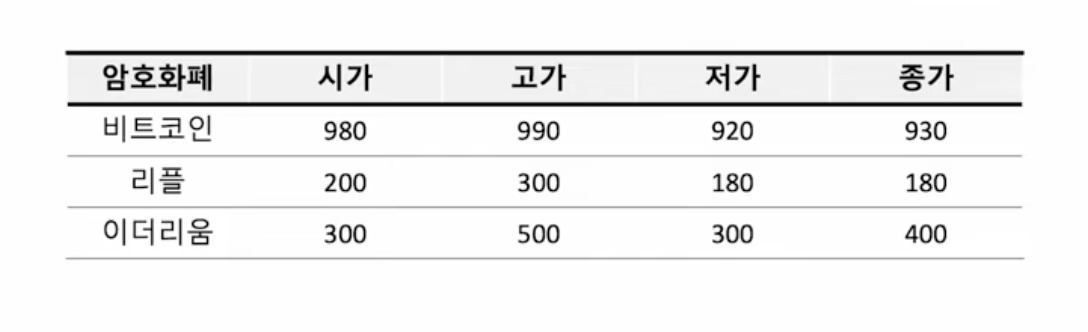

In [24]:
import pandas as pd

index = ['비트코인', '리플', '이더리움']
columns = ['시가', '고가', '저가', '종가']

# 딕셔너리로 생성

data = {
    '시가': [980, 200, 300], # 열
    '고가': [990, 300, 500],
    '저가': [920, 180, 300],
    '종가': [930, 180, 400],
}

df1 = pd.DataFrame(data, index = index)
df1

# 2차원 배열로 생성
array = [
    [980, 990, 920, 930], # 행
    [200, 300, 180, 180], # 행
    [300, 500, 300, 400], # 행
]

df2 = pd.DataFrame(array, index=index, columns=columns)
df2


,시가,고가,저가,종가
비트코인,980,990,920,930
리플,200,300,180,180
이더리움,300,500,300,400


## 슬라이싱과 인덱싱

In [12]:
# 슬라이싱으로 영역 선택
df2.iloc[0:2, 0:2]

# 다중 선택으로 영역 선택
#iloc[[행번호 리스트], [열번호 리스트]]
df2.iloc[[0, 1, 2], [0, 3]]

df2.loc[['비트코인', '리플'], ['시가', '종가']]

df2.iloc[0:2, 0:4:3]

,시가,종가
비트코인,980,930
리플,200,180


## 데이터프레임 추가/삭제

In [25]:
df2

,시가,고가,저가,종가
비트코인,980,990,920,930
리플,200,300,180,180
이더리움,300,500,300,400


In [30]:
df2['추가'] = [100, 200, 300]
df2['추가'] = 1000

df2

,시가,고가,저가,종가,마지막가,추가
비트코인,980,990,920,930,100,1000
리플,200,300,180,180,200,1000
이더리움,300,500,300,400,300,1000


In [4]:
!pip install pyupbit

In [29]:
# 업비트 데이터 생성
import pyupbit

df = pyupbit.get_ohlcv("KRW-BTC") # 최근 200일 일봉데이터
df

df.head()

,open,high,low,close,volume,value
2024-07-21 09:00:00,94073000.0,95299000.0,92413000.0,95000000.0,2999.300042,2.825117e+11
2024-07-22 09:00:00,95000000.0,95353000.0,93050000.0,94357000.0,2864.068723,2.700861e+11
2024-07-23 09:00:00,94284000.0,94748000.0,92000000.0,92230000.0,3198.172668,2.980555e+11
2024-07-24 09:00:00,92196000.0,93494000.0,91051000.0,91501000.0,3120.287339,2.877575e+11
2024-07-25 09:00:00,91501000.0,93138000.0,89202000.0,92465000.0,4242.342600,3.840227e+11


In [30]:
# 컬럼 추가
diff = df['high'] - df['low']
df['range'] = diff
df.head()


,open,high,low,close,volume,value,range
2024-07-21 09:00:00,94073000.0,95299000.0,92413000.0,95000000.0,2999.300042,2.825117e+11,2886000.0
2024-07-22 09:00:00,95000000.0,95353000.0,93050000.0,94357000.0,2864.068723,2.700861e+11,2303000.0
2024-07-23 09:00:00,94284000.0,94748000.0,92000000.0,92230000.0,3198.172668,2.980555e+11,2748000.0
2024-07-24 09:00:00,92196000.0,93494000.0,91051000.0,91501000.0,3120.287339,2.877575e+11,2443000.0
2024-07-25 09:00:00,91501000.0,93138000.0,89202000.0,92465000.0,4242.342600,3.840227e+11,3936000.0


### 데이터 삭제
axis=0 : 행삭제 (0차원의 데이터 삭제라고 보면됨)
axis=1 : 열삭제 (1차원의 데이터 삭제라고 보면됨)

아래데이터에서 0차원 즉 배열에서 첫번째 인덱싱하는 []의 데이터는 행배열이므로 행삭제
1차원은 실데 데이터 배열 안에있는 각각의 데이터이며 해당 데이터와 같은 레벨의 다른 데이터들을 의미하므로 열삭제
(980과 200이 같은 레벨)

```
[
    [980, 990, 920],
    [200, 300, 180],
]
```

In [31]:
# 컬럼 삭제
df.drop('value', axis=1, inplace=True)
df

,open,high,low,close,volume,range
2024-07-21 09:00:00,94073000.0,95299000.0,92413000.0,95000000.0,2999.300042,2886000.0
2024-07-22 09:00:00,95000000.0,95353000.0,93050000.0,94357000.0,2864.068723,2303000.0
2024-07-23 09:00:00,94284000.0,94748000.0,92000000.0,92230000.0,3198.172668,2748000.0
2024-07-24 09:00:00,92196000.0,93494000.0,91051000.0,91501000.0,3120.287339,2443000.0
2024-07-25 09:00:00,91501000.0,93138000.0,89202000.0,92465000.0,4242.342600,3936000.0
...,...,...,...,...,...,...
2025-02-01 09:00:00,156580000.0,158090000.0,155888000.0,157330000.0,1638.459490,2202000.0
2025-02-02 09:00:00,157399000.0,157925000.0,152477000.0,154000000.0,4152.764715,5448000.0
2025-02-03 09:00:00,154000000.0,160304000.0,145000000.0,158217000.0,10213.117279,15304000.0
2025-02-04 09:00:00,158217000.0,159439000.0,153000000.0,154122000.0,3536.849292,6439000.0


In [52]:
# 컬럼 여러개 삭제
removed_df = df.drop(['open', 'volume'], axis=1)
removed_df

,high,low,close,range
2024-07-21 09:00:00,95299000.0,92413000.0,95000000.0,2886000.0
2024-07-22 09:00:00,95353000.0,93050000.0,94357000.0,2303000.0
2024-07-23 09:00:00,94748000.0,92000000.0,92230000.0,2748000.0
2024-07-24 09:00:00,93494000.0,91051000.0,91501000.0,2443000.0
2024-07-25 09:00:00,93138000.0,89202000.0,92465000.0,3936000.0
...,...,...,...,...
2025-02-03 09:00:00,160304000.0,145000000.0,158217000.0,15304000.0
2025-02-04 09:00:00,159439000.0,153000000.0,154122000.0,6439000.0
2025-02-05 09:00:00,155662000.0,152495000.0,152630000.0,3167000.0
2222-02-06 09:00:00,100.0,200.0,300.0,500.0


In [47]:
# row추가
type(df.index[0]) # Timestamp형 date타입
index = pd.to_datetime('2222-02-06 09:00:00')
arr = [100. * i for i in range(6)]
df.loc[index] = arr
df.tail()


,open,high,low,close,volume,range
2025-02-03 09:00:00,154000000.0,160304000.0,145000000.0,158217000.0,10213.117279,15304000.0
2025-02-04 09:00:00,158217000.0,159439000.0,153000000.0,154122000.0,3536.849292,6439000.0
2025-02-05 09:00:00,154140000.0,155662000.0,152495000.0,152630000.0,793.722358,3167000.0
2222-02-06 09:00:00,0.0,100.0,200.0,300.0,400.000000,500.0
2222-02-07 09:00:00,0.0,0.0,0.0,0.0,0.000000,0.0


In [51]:
# row삭제
target_index = df.index[-2] # index리스트에서 인덱스값 뽑아오기
removed_df = df.drop(target_index, axis=0)
removed_df

,open,high,low,close,volume,range
2024-07-21 09:00:00,94073000.0,95299000.0,92413000.0,95000000.0,2999.300042,2886000.0
2024-07-22 09:00:00,95000000.0,95353000.0,93050000.0,94357000.0,2864.068723,2303000.0
2024-07-23 09:00:00,94284000.0,94748000.0,92000000.0,92230000.0,3198.172668,2748000.0
2024-07-24 09:00:00,92196000.0,93494000.0,91051000.0,91501000.0,3120.287339,2443000.0
2024-07-25 09:00:00,91501000.0,93138000.0,89202000.0,92465000.0,4242.342600,3936000.0
...,...,...,...,...,...,...
2025-02-02 09:00:00,157399000.0,157925000.0,152477000.0,154000000.0,4152.764715,5448000.0
2025-02-03 09:00:00,154000000.0,160304000.0,145000000.0,158217000.0,10213.117279,15304000.0
2025-02-04 09:00:00,158217000.0,159439000.0,153000000.0,154122000.0,3536.849292,6439000.0
2025-02-05 09:00:00,154140000.0,155662000.0,152495000.0,152630000.0,793.722358,3167000.0


In [ ]:
# 복습용

# 데이터 프레임 생성
pd.DataFrame(np.arange(1, 10).reshape(3, -1))

# 행(인덱스), 열(컬럼명) 지정


In [ ]:
# 인덱스명과 칼럼명을 지정해주기
import numpy as np
import pandas as pd

data = np.array([[1, 2, 3], [4, 5, 6], [7, 8 ,9], [10, 11, 12]])
index_date = pd.date_range('2019-09-01', periods=4) # 행
columns_list = ['A', 'B', 'C'] # 열
pd.DataFrame(data, index=index_date, columns=columns_list)

# 점수 데이터 셋
scores = [[10, 20, 30], [40, 50, 60], [70, 80, 90]]
index = ['영희', '철수', '민수']
columns = ['국어', '영어', '수학']
df = pd.DataFrame(scores, index=index, columns=columns)

df.index
df.info
df.columns
df.values

array([[10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

# 문제
영희, 철수, 민수의 국어, 영어, 수학 점수를 DataFrame으로 선언해보자. 점수는 임의로 설정

In [ ]:
scores = [[10, 20, 30], [40, 50, 60], [70, 80, 100]]
index_list = ['영희', '철수', '민수']
column_list = ['국어', '영어', '수학']

pd.DataFrame(scores, index=index_list, columns=column_list)

,국어,영어,수학
영희,10,20,30
철수,40,50,60
민수,70,80,100


In [ ]:
table_data = {'연도': [2015, 2016, 2016, 2017, 2017],
              '지사': ['한국', '한국', '미국', '한국','미국'],
              '고객 수': [200, 250, 450, 300, 500]}
table_data

{'연도': [2015, 2016, 2016, 2017, 2017],
 '지사': ['한국', '한국', '미국', '한국', '미국'],
 '고객 수': [200, 250, 450, 300, 500]}

In [ ]:
pd.DataFrame(table_data)

,연도,지사,고객 수
0,2015,한국,200
1,2016,한국,250
2,2016,미국,450
3,2017,한국,300
4,2017,미국,500


In [ ]:
df = pd.DataFrame(table_data, columns=['연도', '지사', '고객 수'])
df

,연도,지사,고객 수
0,2015,한국,200
1,2016,한국,250
2,2016,미국,450
3,2017,한국,300
4,2017,미국,500


In [ ]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
df.columns

Index(['연도', '지사', '고객 수'], dtype='object')

In [ ]:
df.values

array([[2015, '한국', 200],
       [2016, '한국', 250],
       [2016, '미국', 450],
       [2017, '한국', 300],
       [2017, '미국', 500]], dtype=object)

#### 데이터 요약 정보 확인하기
* 데이터프레임의 크기 확인: DataFrame 객체.shape
* 데이터프레임의 기본 정보 출력: DataFrame 객체.info()
* 열 데이터 개수 확인: DataFrame.count()
* 열 데이터의 고유값 개수: DataFrame 객체["열 이름"].value_counts()

In [ ]:
# df의 모양과 크기 확인: (행의 개수, 열의 개수) 튜플로 반환
df.shape

(5, 3)

In [ ]:
# 데이터프레임의 기본 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      5 non-null      int64 
 1   지사      5 non-null      object
 2   고객 수    5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


In [ ]:
# 각 열의 데이터 개수 확인
df.count()

,0
연도,5
지사,5
고객 수,5


In [ ]:
# 각 열의 고유값 개수
# df['연도'].value_counts()
df['지사'].value_counts()

,count
지사,
한국,3
미국,2


### 2.2 데이터 연산

In [ ]:
# pandas의 Series()와 DataFrame()으로 생성한 데이터끼리는 사칙 연산이 가능
s1 = pd.Series([1, 2, 3, 4, 5])
s2 = pd.Series([10, 20, 30, 40, 50])

In [ ]:
s1 + s2

0    11
1    22
2    33
3    44
4    55
dtype: int64

In [ ]:
s2 - s1

0     9
1    18
2    27
3    36
4    45
dtype: int64

In [ ]:
s1 * s2

0     10
1     40
2     90
3    160
4    250
dtype: int64

In [ ]:
s2 / s1

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
dtype: float64

In [ ]:
# 파이썬의 리스트와 NumPy 배열과는 달리 Pandas의 데이터끼리는 서로 크기가 달라도 연산 가능, 다만 이 경우 연산을 할 수 있는 항목만 연산을 수행
s3 = pd.Series([1, 2, 3, 4])
s4 = pd.Series([10, 20, 30, 40, 50])
s3 + s4

0    11.0
1    22.0
2    33.0
3    44.0
4     NaN
dtype: float64

In [ ]:
s4 - s3

0     9.0
1    18.0
2    27.0
3    36.0
4     NaN
dtype: float64

In [ ]:
s3 * s4

0     10.0
1     40.0
2     90.0
3    160.0
4      NaN
dtype: float64

In [ ]:
s4/s3

0    10.0
1    10.0
2    10.0
3    10.0
4     NaN
dtype: float64

In [ ]:
# 데이터프레임 데이터끼리 연산하기
table_data1 = {'A': [1, 2, 3, 4, 5],
              'B': [10, 20, 30, 40, 50],
              'C': [100, 200, 300, 400, 500]}
df1 = pd.DataFrame(table_data1)
df1

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [ ]:
table_data2 = {'A': [6, 7, 8],
              'B': [60, 70, 80],
              'C': [600, 700, 800]}
df2 = pd.DataFrame(table_data2)
df2

,A,B,C
0,6,60,600
1,7,70,700
2,8,80,800


In [ ]:
# Q. 결과가 어떻게 나올지 먼저 예상해보기
df1 + df2

,A,B,C
0,7.0,70.0,700.0
1,9.0,90.0,900.0
2,11.0,110.0,1100.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [ ]:
# pandas에서 지원하는 통계 분석을 위한 메서드
table_data3 = {'봄':  [256.5, 264.3, 215.9, 223.2, 312.8],
              '여름': [770.6, 567.5, 599.8, 387.1, 446.2],
              '가을': [363.5, 231.2, 293.1, 247.7, 381.6],
              '겨울': [139.3, 59.9, 76.9, 109.1, 108.1]}
columns_list = ['봄', '여름', '가을', '겨울']
index_list = ['2012', '2013', '2014', '2015', '2016']
print(index_list)

df3 = pd.DataFrame(table_data3, columns = columns_list, index = index_list)
df3

['2012', '2013', '2014', '2015', '2016']


,봄,여름,가을,겨울
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1


In [ ]:
# axis: 0 : 열
# axis: 1 : 행

# column별 평균과 표준편차 구하기
df3.mean()

# row별 평균과 표준편차 구하기
# df3.mean(1)

# column별: 0 (default) -> axis=0
# row별: 1 -> axis=1

,0
봄,254.54
여름,554.24
가을,303.42
겨울,98.66


In [ ]:
df3.std() # 표준편차

,0
봄,38.628267
여름,148.888895
가을,67.358496
겨울,30.925523


In [ ]:
# 그렇다면 연도별 평균 강수량과 표준 편차를 구하려면 어떻게 해야할까?
# 연산의 방향을 설정하기 위해 axis 인자를 추가 <axis=1: 행별로 연산 수행, axis=0(default): 열별로 연산 수행>

# 평균 강수량
df3.mean(axis=1)

,0
2012,382.475
2013,280.725
2014,296.425
2015,241.775
2016,312.175


In [ ]:
df3.std(axis=1) # 표준편차

,0
2012,274.472128
2013,211.128782
2014,221.150739
2015,114.166760
2016,146.548658


In [ ]:
# describe()를 이용하여 평균, 표준 편차, 최솟값과 최댓값을 한 번에 구할 수 있다.
df3.describe()

,봄,여름,가을,겨울
count,5.000000,5.000000,5.000000,5.000000
mean,254.540000,554.240000,303.420000,98.660000
std,38.628267,148.888895,67.358496,30.925523
min,215.900000,387.100000,231.200000,59.900000
25%,223.200000,446.200000,247.700000,76.900000
50%,256.500000,567.500000,293.100000,108.100000
75%,264.300000,599.800000,363.500000,109.100000
max,312.800000,770.600000,381.600000,139.300000


### 2.3 행 인덱스 변경, 열 이름 변경
* 행 인덱스 변경: DataFrame 객체.rename(index={기존 인덱스:새 인덱스, ...})
* 열 이름 변경: DataFrame 객체.rename(columns={기존 이름:새 이름, ...})

In [ ]:
data = [[15, '남', '덕영중'], [17, '여', '수리중']]

df = pd.DataFrame(data,
                 index = ['준서', '예은'],
                 columns = ['나이', '성별', '학교'])
df

,나이,성별,학교
준서,15,남,덕영중
예은,17,여,수리중


# 열 이름 중, '나이'를 '연령'으로, '성별'을 '남녀'로, '학교'를 '소속'으로 바꾸기
df.rename(columns={'나이':'연령', '성별':'남녀', '학교':'소속'}, inplace=True)
df

In [ ]:
# df의 행 인덱스 중에서, '준서'를 '학생1'로, '예은'을 '학생2'로 바꾸기
df.rename(index={'준서':'학생1', '예은':'학생2'}, inplace=True)
df

,연령,남녀,소속
학생1,15,남,덕영중
학생2,17,여,수리중


### 2.4 데이터프레임 행/열 삭제
* 행 삭제: DataFrame 객체.drop(행 인덱스 또는 배열, axis=0)
* 열 삭제: DataFrame 객체.drop(열 이름 또는 배열, axis=1)

In [ ]:
# DataFrame()함수로 데이터프레임 변환, 변수 df에 저장
exam_data = {'수학' : [90, 80, 70], '영어' : [98, 89, 95],
             '음악' : [85, 95, 100], '체육' : [100, 90, 90]}
df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [ ]:
# 데이터프레임 df를 복제하여 변수 df2에 저장. df2의 1개 행(row)을 삭제
df2 = df.copy()
df2.drop('우현', axis=0, inplace=True)
df2

,수학,영어,음악,체육
서준,90,98,85,100
인아,70,95,100,90


In [ ]:
# 데이터프레임 df를 복제하여 변수 df3에 저장. df3의 2개 행(row)을 삭제
df3 = df.copy()
df3.drop(['우현', '인아'], axis=0, inplace=True)
df3

,수학,영어,음악,체육
서준,90,98,85,100


In [ ]:
# Q. 데이터프레임 df를 복제하여 변수 df4에 저장. df4의 '수학' 1개 열(column)을 삭제해보세요.
df4 = df.copy()
df4

df4.drop(['수학'], axis=1, inplace=True)
df4


In [ ]:
# Q. 데이터프레임 df를 복제하여 변수 df5에 저장. df5의 '영어', '음악' 2개 열(column)을 삭제해보세요.
df5 = df.copy()

df5.drop(['영어', '음악'], axis=1, inplace=True)
df5


,수학,체육
서준,90,100
우현,80,90
인아,70,90


### 2.5 데이터를 원하는 대로 선택하기

In [ ]:
import pandas as pd
import numpy as np

KTX_data = {'경부선 KTX': [39060, 39896, 42005, 43621, 41702, 41266, 32427],
            '호남선 KTX': [7313, 6967, 6873, 6626, 8675, 10622, 9228],
            '경전선 KTX': [3627, 4168, 4088, 4424, 4606, 4984, 5570],
            '전라선 KTX': [309, 1771, 1954, 2244, 3146, 3945, 5766],
            '동해선 KTX': [np.nan,np.nan, np.nan, np.nan, 2395, 3786, 6667]}
col_list = ['경부선 KTX','호남선 KTX','경전선 KTX','전라선 KTX','동해선 KTX']
index_list = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']

df_KTX = pd.DataFrame(KTX_data, columns = col_list, index = index_list)
df_KTX

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2011,39060,7313,3627,309,NaN
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0
2016,41266,10622,4984,3945,3786.0
2017,32427,9228,5570,5766,6667.0


In [ ]:
df_KTX.index

Index(['2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

In [ ]:
df_KTX.columns

Index(['경부선 KTX', '호남선 KTX', '경전선 KTX', '전라선 KTX', '동해선 KTX'], dtype='object')

In [ ]:
df_KTX.values

array([[39060.,  7313.,  3627.,   309.,    nan],
       [39896.,  6967.,  4168.,  1771.,    nan],
       [42005.,  6873.,  4088.,  1954.,    nan],
       [43621.,  6626.,  4424.,  2244.,    nan],
       [41702.,  8675.,  4606.,  3146.,  2395.],
       [41266., 10622.,  4984.,  3945.,  3786.],
       [32427.,  9228.,  5570.,  5766.,  6667.]])

In [ ]:
# DataFrame의 전체 데이터 중 처음 일부분과 끝 일부분만 반환하기
# 인자 n을 지정하기 않으면 기본값으로 5가 지정됨
df_KTX.head()

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2011,39060,7313,3627,309,NaN
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0


In [ ]:
df_KTX.tail()

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0
2016,41266,10622,4984,3945,3786.0
2017,32427,9228,5570,5766,6667.0


In [ ]:
df_KTX.head(3)

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2011,39060,7313,3627,309,NaN
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN


In [ ]:
df_KTX.tail(2)

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2016,41266,10622,4984,3945,3786.0
2017,32427,9228,5570,5766,6667.0


In [ ]:
# DataFrame 데이터에서 연속된 구간의 행 데이터를 선택하려면 '행 시작 위치'와 '끝 위치'를 지정
# <DataFrame_data[행_시작_위치:행_끝_위치]>
df_KTX[1:2] # 행 위치 1의 데이터 하나를 선택

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2012,39896,6967,4168,1771,NaN


In [ ]:
# Q. df_KTX에서 2013~2015년도 행 전체 데이터를 선택하기
df_KTX[2:5]

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0


In [ ]:
# index 항목 이름을 지정해 행을 선택하기
df_KTX.loc['2011']

,2011
경부선 KTX,39060.0
호남선 KTX,7313.0
경전선 KTX,3627.0
전라선 KTX,309.0
동해선 KTX,NaN


In [ ]:
# Q. 2013-2016년도까지의 행 데이터 선택하기 - loc 이용
df_KTX.loc['2013':'2016']

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0
2016,41266,10622,4984,3945,3786.0


In [ ]:
# 데이터에서 하나의 열만 선택하려면 하나의 columns 항목 이름을 지정
df_KTX['경부선 KTX']

,경부선 KTX
2011,39060
2012,39896
2013,42005
2014,43621
2015,41702
2016,41266
2017,32427


In [ ]:
# 하나의 열을 선택한 후 index의 범위를 지정해 원하는 데이터만 선택
df_KTX['경부선 KTX']['2012':'2014'] # index의 이름을 지정해 index의 범위 선택

,경부선 KTX
2012,39896
2013,42005
2014,43621


In [ ]:
df_KTX['경부선 KTX'][2:5] # index의 위치를 지정해 index의 범위 선택

2013    42005
2014    43621
2015    41702
Name: 경부선 KTX, dtype: int64

In [ ]:
# 어떤 방법으로 index의 범위를 지정해도 원하는 범위의 데이터를 선택할 수 있음
# 아래 코드를 실행시켜보면서 결과값 비교해보기
df_KTX

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2011,39060,7313,3627,309,NaN
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0
2016,41266,10622,4984,3945,3786.0
2017,32427,9228,5570,5766,6667.0


In [ ]:
df_KTX.loc['2016']['호남선 KTX']

10622.0

In [ ]:
df_KTX.loc['2016','호남선 KTX']

10622

In [ ]:
df_KTX['호남선 KTX']['2016']

10622

In [ ]:
df_KTX['호남선 KTX'][5]

10622

In [ ]:
df_KTX['호남선 KTX'].loc['2016']

10622

In [ ]:
# df_KTX의 전치 구하기 - 행과 열이 바뀜
df_KTX.T

,2011,2012,2013,2014,2015,2016,2017
경부선 KTX,39060.0,39896.0,42005.0,43621.0,41702.0,41266.0,32427.0
호남선 KTX,7313.0,6967.0,6873.0,6626.0,8675.0,10622.0,9228.0
경전선 KTX,3627.0,4168.0,4088.0,4424.0,4606.0,4984.0,5570.0
전라선 KTX,309.0,1771.0,1954.0,2244.0,3146.0,3945.0,5766.0
동해선 KTX,NaN,NaN,NaN,NaN,2395.0,3786.0,6667.0


In [ ]:
df_KTX

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2011,39060,7313,3627,309,NaN
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0
2016,41266,10622,4984,3945,3786.0
2017,32427,9228,5570,5766,6667.0


In [ ]:
# 열의 항목 이름을 지정해 열의 순서를 지정할 수 있다. - 중요!
df_KTX[['동해선 KTX', '전라선 KTX', '경전선 KTX', '호남선 KTX', '경부선 KTX']]

,동해선 KTX,전라선 KTX,경전선 KTX,호남선 KTX,경부선 KTX
2011,NaN,309,3627,7313,39060
2012,NaN,1771,4168,6967,39896
2013,NaN,1954,4088,6873,42005
2014,NaN,2244,4424,6626,43621
2015,2395.0,3146,4606,8675,41702
2016,3786.0,3945,4984,10622,41266
2017,6667.0,5766,5570,9228,32427


### 2.6 데이터 통합하기

#### 세로 방향(index 증가 방향)으로 통합하기
<DataFrame_data1.append(DataFrame_data2, ignore_index=True)>

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({'Class1': [95, 92, 98, 100],
                    'Class2': [91, 93, 97, 99]})
df1

,Class1,Class2
0,95,91
1,92,93
2,98,97
3,100,99


In [ ]:
df2 = pd.DataFrame({'Class1': [87, 89],
                    'Class2': [85, 90]})
df2

,Class1,Class2
0,87,85
1,89,90


In [ ]:
# 행추가, 열추가 모두 가능한 메소드로 append나 join보다 많이 사용
pd.concat([df1, df2], axis=0, ignore_index=True)

,Class1,Class2
0,95,91
1,92,93
2,98,97
3,100,99
4,87,85
5,89,90


In [ ]:
df1

,Class1,Class2
0,95,91
1,92,93
2,98,97
3,100,99


In [ ]:
df3 = pd.DataFrame({'Class1': [96, 83]})
df3

,Class1
0,96
1,83


#### 가로 방향으로 통합하기

In [ ]:
pd.concat([df1, df3], axis=1)

,Class1,Class2,Class1
0,95,91,96.0
1,92,93,83.0
2,98,97,NaN
3,100,99,NaN


In [ ]:
df4 = pd.DataFrame({'Class3': [93, 91, 95, 98]})
df4

,Class3
0,93
1,91
2,95
3,98


In [ ]:
# 두 개의 DataFrame 데이터를 가로 방향으로 합치기 위해 join()함수 사용
# 마찬가지로 df1 원본 데이터프레임은 변하지 않음
df1.join(df4)

,Class1,Class2,Class3
0,95,91,93
1,92,93,91
2,98,97,95
3,100,99,98


In [ ]:
df1

,Class1,Class2
0,95,91
1,92,93
2,98,97
3,100,99


In [ ]:
index_label = ['a','b','c','d']
df1a = pd.DataFrame({'Class1': [95, 92, 98, 100],
                    'Class2': [91, 93, 97, 99]}, index=index_label)
df4a = pd.DataFrame({'Class3': [93, 91, 95, 98]}, index=index_label)

df1a.join(df4a)

,Class1,Class2,Class3
a,95,91,93
b,92,93,91
c,98,97,95
d,100,99,98


In [ ]:
df5 = pd.DataFrame({'Class4': [82, 92]})
df5

,Class4
0,82
1,92


In [ ]:
df1.join(df5)

,Class1,Class2,Class4
0,95,91,82.0
1,92,93,92.0
2,98,97,NaN
3,100,99,NaN


#### 특정 열을 기준으로 통합하기

In [ ]:
df_A_B = pd.DataFrame({'판매월': ['1월', '2월', '3월', '4월'],
                       '제품A': [100, 150, 200, 130],
                       '제품B': [90, 110, 140, 170]})
df_A_B

,판매월,제품A,제품B
0,1월,100,90
1,2월,150,110
2,3월,200,140
3,4월,130,170


In [ ]:
df_C_D = pd.DataFrame({'판매월': ['1월', '2월', '3월', '4월'],
                       '제품C': [112, 141, 203, 134],
                       '제품D': [90, 110, 140, 170]})
df_C_D

,판매월,제품C,제품D
0,1월,112,90
1,2월,141,110
2,3월,203,140
3,4월,134,170


In [ ]:
# 두 개의 DataFrame 데이터에 공통된 열이 있다면 이 열을 기준으로 두 데이터를 통합할 수 있음
df_A_B.merge(df_C_D)

,판매월,제품A,제품B,제품C,제품D
0,1월,100,90,112,90
1,2월,150,110,141,110
2,3월,200,140,203,140
3,4월,130,170,134,170


In [ ]:
df_left = pd.DataFrame({'key':['A','B','C'], 'left': [1, 2, 3]})
df_left

,key,left
0,A,1
1,B,2
2,C,3


In [ ]:
df_right = pd.DataFrame({'key':['A','B','D'], 'right': [4, 5, 6]})
df_right

,key,right
0,A,4
1,B,5
2,D,6


|how 선택 인자|설명|
|:-------------------|:---------------------------------------------|
|left|왼쪽 데이터는 모두 선택하고 지정된 열(key)에 값이 있는 오른쪽 데이터를 선택|
|right|오른쪽 데이터는 모두 선택하고 지정된 열(key)에 값이 있는 왼쪽 데이터를 선택|
|outer|지정된 열(key)을 기준으로 왼쪽과 오른쪽 데이터를 모두 선택|
|inner|지정된 열(key)을 기준으로 왼쪽과 오른쪽 데이터 중 공통 항목만 선택(기본값)|

In [ ]:
# 두 개의 DataFrame 데이터가 특정 열을 기준으로 일부만 공통된 값을 갖는 경우에 통합
df_left.merge(df_right, how='left', on = 'key')

,key,left,right
0,A,1,4.0
1,B,2,5.0
2,C,3,NaN


In [ ]:
# 배열에 NaN이 들어가면 다른 데이터들도 실수로 변환
df_left.merge(df_right, how='right', on = 'key')

,key,left,right
0,A,1.0,4
1,B,2.0,5
2,D,NaN,6


In [ ]:
df_left.merge(df_right, how='outer', on = 'key')

,key,left,right
0,A,1.0,4.0
1,B,2.0,5.0
2,C,3.0,NaN
3,D,NaN,6.0


In [ ]:
df_left.merge(df_right, how='inner', on = 'key')

,key,left,right
0,A,1,4
1,B,2,5


### 2.7 데이터 파일을 읽고 쓰기

#### 표 형식의 데이터 파일을 읽기

In [ ]:
%%writefile sea_rain1.csv
연도,동해,남해,서해,전체
1996,17.4629,17.2288,14.436,15.9067
1997,17.4116,17.4092,14.8248,16.1526
1998,17.5944,18.011,15.2512,16.6044
1999,18.1495,18.3175,14.8979,16.6284
2000,17.9288,18.1766,15.0504,16.6178

Writing sea_rain1.csv


In [ ]:
import pandas as pd

pd.read_csv('./sea_rain1.csv')

,연도,동해,남해,서해,전체
0,1996,17.4629,17.2288,14.4360,15.9067
1,1997,17.4116,17.4092,14.8248,16.1526
2,1998,17.5944,18.0110,15.2512,16.6044
3,1999,18.1495,18.3175,14.8979,16.6284
4,2000,17.9288,18.1766,15.0504,16.6178


In [ ]:
%%writefile sea_rain1_space.txt
연도 동해 남해 서해 전체
1996 17.4629 17.2288 14.436 15.9067
1997 17.4116 17.4092 14.8248 16.1526
1998 17.5944 18.011 15.2512 16.6044
1999 18.1495 18.3175 14.8979 16.6284
2000 17.9288 18.1766 15.0504 16.6178

Writing sea_rain1_space.txt


In [ ]:
# 텍스트 파일에서 데이터 필드가 콤마가 아니라 공백으로 구분되어 있을 때 'sep=구분자' 옵션 사용
pd.read_csv('./sea_rain1_space.txt', sep=" ")

,연도,동해,남해,서해,전체
0,1996,17.4629,17.2288,14.4360,15.9067
1,1997,17.4116,17.4092,14.8248,16.1526
2,1998,17.5944,18.0110,15.2512,16.6044
3,1999,18.1495,18.3175,14.8979,16.6284
4,2000,17.9288,18.1766,15.0504,16.6178


In [ ]:
pd.read_csv('./sea_rain1_space.txt', sep=" ").columns # 모든 컬럼을 묶은 1개
pd.read_csv('./sea_rain1_space.txt').columns # 5개

Index(['연도 동해 남해 서해 전체'], dtype='object')

In [ ]:
# 자동 생성된 index말고 특정 열을 index로 선택하려면 'index_col=열 이름'
pd.read_csv('./sea_rain1.csv', index_col="연도" )

,동해,남해,서해,전체
연도,,,,
1996,17.4629,17.2288,14.4360,15.9067
1997,17.4116,17.4092,14.8248,16.1526
1998,17.5944,18.0110,15.2512,16.6044
1999,18.1495,18.3175,14.8979,16.6284
2000,17.9288,18.1766,15.0504,16.6178


#### 표 형식의 데이터를 파일로 쓰기

In [ ]:
df_WH = pd.DataFrame({'Weight':[62, 67, 55, 74],
                      'Height':[165, 177, 160, 180]},
                       index=['ID_1', 'ID_2', 'ID_3', 'ID_4'])
df_WH.index.name = 'User'
df_WH

,Weight,Height
User,,
ID_1,62,165
ID_2,67,177
ID_3,55,160
ID_4,74,180


In [ ]:
bmi = df_WH['Weight']/(df_WH['Height']/100)**2
bmi

37.57575757575758

In [ ]:
df_WH['BMI'] = bmi
df_WH

,Weight,Height,BMI
User,,,
ID_1,62,165,22.773186
ID_2,67,177,21.385936
ID_3,55,160,21.484375
ID_4,74,180,22.839506


In [ ]:
df_WH.to_csv('./save_DataFrame.csv')

In [ ]:
df_pr = pd.DataFrame({'판매가격':[2000, 3000, 5000, 10000],
                       '판매량':[32, 53, 40, 25]},
                       index=['P1001', 'P1002', 'P1003', 'P1004'])
df_pr.index.name = '제품번호'
df_pr

,판매가격,판매량
제품번호,,
P1001,2000,32
P1002,3000,53
P1003,5000,40
P1004,10000,25


In [ ]:
file_name = './save_DataFrame.txt'
df_pr.to_csv(file_name, sep=" ")

In [ ]:
df_q = pd.DataFrame({'col1':['&', 'a', '-', ','],
                      'col2':[165, 177, 160, 180]})

In [ ]:
df_q

,col1,col2
0,&,165
1,a,177
2,-,160
3,",",180


In [ ]:
df_q.to_csv('df_q.csv', index=False)

In [ ]:
# quoting: 1인경우 ""안에 데이터가 들어오는것으로 특수문자인 경우 1로 설정하기
df = pd.read_csv('df_q.csv', quoting=1)

df

,col1,col2
0,&,165
1,a,177
2,-,160
3,",",180


인용처리 대상  
- 0 : 모두  
- 1 : 특수문자
- 2 : 숫자 빼고
- 3 : None

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    4 non-null      object
 1   col2    4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


### 2.8 판다스 내장 그래프 도구 활용

* 내장 plot( ) 메소드
|<center>kind 옵션</center>|<center>설명</center>|kind 옵션|<center>설명</center>|
|:----:|:-------|:----:|:-------|
|'line'|선 그래프|'kde'|커널 밀도 그래프|
|'bar'|수직 막대 그래프|'area'|면적 그래프|
|'barh'|수평 막대 그래프|'pie'|파이 그래프|
|'his'|히스토그램|'scatter'|산점도 그래프|
|'box|박스 플롯|'hexbin'|고밀도 산점도 그래프


In [ ]:
# 선 그래프: DataFrame 객체.plot()
import pandas as pd

# 병합셀은 NaN으로 처리됨
df = pd.read_excel('/content/남북한발전전력량.xlsx')
df


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
# iloc: 위치값(index값)으로 명시 / loc: 이름값으로 명시
df_ns = df.iloc[[0, 5], 3:] # 0, 5번째 행/ 3번째 열부터~
df_ns

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
5,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


In [ ]:
df_ns = df.iloc[[0, 5], 3:]
df_ns.index = ['South', 'North']
df_ns.columns = df_ns.columns.map(int) # 포를 숫자형으로 변경
df_ns.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


<Axes: >

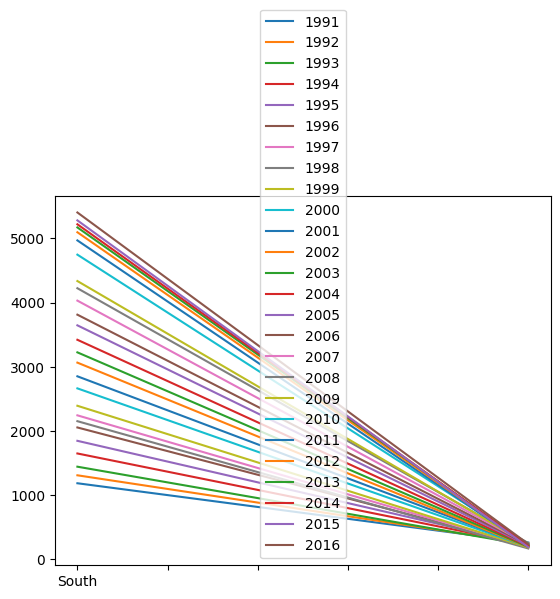

In [ ]:
# 선 그래프 그리기
df_ns.plot()

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230




<Axes: >

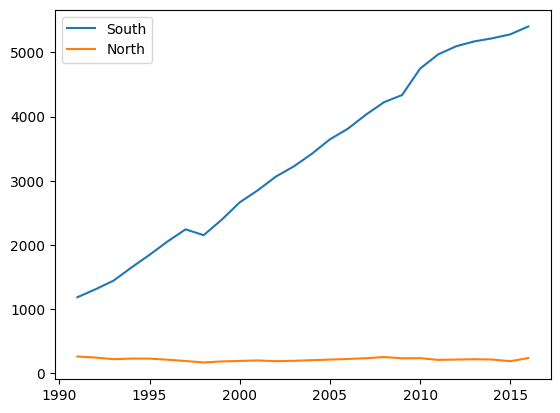

In [ ]:
tdf_ns = df_ns.T # 전치행렬로 colum과 row의 위치 바꾸기
print(tdf_ns.head())
print('\n')

tdf_ns.plot()

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230




<Axes: >

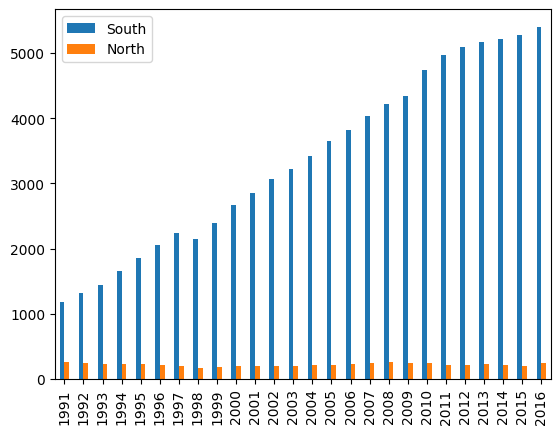

In [ ]:
# 막대 그래프: DataFrame 객체.plot(kind='bar')

import pandas as pd

df = pd.read_excel('/content/남북한발전전력량.xlsx')

df_ns = df.iloc[[0, 5], 3:]
df_ns.index = ['South', 'North']
df_ns.columns = df_ns.columns.map(int)

# 행, 열 전치하여 막대 그래프 그리기
tdf_ns = df_ns.T
print(tdf_ns.head())
print('\n')

tdf_ns.plot(kind='bar')

In [ ]:
# 히스토그램: DataFrame 객체.plot(kind='hist')

import pandas as pd

# 위 코드를 참고하여 히스토그램 그래프가 출력되도록 직접 작성해보세요!


##### pandas 실습문제 - 아래 문제들을 직접 풀어보세요!

In [ ]:
# 1. 아래 Series 데이터를 하나의 데이터프레임으로 합쳐보세요.
import numpy as np
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

In [ ]:
# 2. 다음의 데이터프레임을 생성해보세요. 생성된 데이터프레임은 df 변수에 할당합니다.
data = {
    'food': ['KFC', 'McDonald', 'SchoolFood'],
    'price': [1000, 2000, 2500],
    'rating': [4.5, 3.9, 4.2]
}
df = pd.DataFrame(data)
df

,food,price,rating
0,KFC,1000,4.5
1,McDonald,2000,3.9
2,SchoolFood,2500,4.2


|  |food|price|rating|
|-:|:---|---:|---:|
|0|KFC|1000|4.5|
|1|McDonald|2000|3.9|
|2|SchoolFood|2500|4.2|


In [ ]:
# 3. 데이터프레임 df를 csv 파일로 저장한 뒤, 다시 읽어오세요.


In [ ]:
# 4. food 칼럼명을 place로 변경해보세요.

In [ ]:
# 5. 칼럼의 순서를 rating, food, price 순으로 바꿔보세요.

In [ ]:
# 6. 데이터프레임 df를 변수 df2에 복사한 뒤, McDonald 행(row)을 삭제해보세요.

In [ ]:
# 7. 데이터프레임 df를 변수 df3에 복사한 뒤, rating, price 2개의 열(column)을 삭제해보세요.

In [ ]:
# 8. SchoolFood의 rating 점수만 출력해보세요.

In [ ]:
# 9. 데이터프레임을 csv파일로 저장해보세요.

<AxesSubplot:>

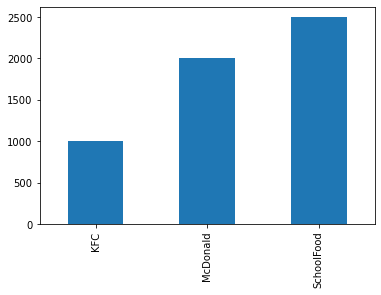

In [ ]:
# 10. 수직막대그래프를 이용하여 각 food별 price를 그래프로 나타내보세요.

import pandas as pd

df = pd.DataFrame({'food':['KFC', 'McDonald', 'SchoolFood'], 'price':[1000, 2000, 2500], 'rating':[4.5, 3.9, 4.2]})

df_ns = df.iloc[:, 1]
df_ns.index = ['KFC', 'McDonald', 'SchoolFood']

df_ns.plot(kind='bar')